In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./weatherAUS.csv')

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
df.shape

(145460, 23)

In [12]:
#cleaning null values first
df = df.dropna(how='any')

In [13]:
df.shape

(56420, 23)

In [17]:
df.describe

<bound method NDFrame.describe of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6049    2009-01-01    Cobar     17.9     35.2       0.0         12.0   
6050    2009-01-02    Cobar     18.4     28.9       0.0         14.8   
6052    2009-01-04    Cobar     19.4     37.6       0.0         10.8   
6053    2009-01-05    Cobar     21.9     38.4       0.0         11.4   
6054    2009-01-06    Cobar     24.2     41.0       0.0         11.2   
...            ...      ...      ...      ...       ...          ...   
142298  2017-06-20   Darwin     19.3     33.4       0.0          6.0   
142299  2017-06-21   Darwin     21.2     32.6       0.0          7.6   
142300  2017-06-22   Darwin     20.7     32.8       0.0          5.6   
142301  2017-06-23   Darwin     19.5     31.8       0.0          6.2   
142302  2017-06-24   Darwin     20.2     31.7       0.0          5.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
6049        12.3         S

In [18]:
df1 = df.drop_duplicates().reset_index(drop = True)

In [19]:
df1.shape

(56420, 23)

In [20]:
df = df1

In [21]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [72]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [73]:
X.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No


In [74]:
#exploring issues with the categorical data
categorical = [var for var in X.columns if X[var].dtype=='O']
print('categorical variables are: ', categorical)

categorical variables are:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [75]:
X[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,2009-01-01,Cobar,SSW,ENE,SW,No
1,2009-01-02,Cobar,S,SSE,SSE,No
2,2009-01-04,Cobar,NNE,NNE,NNW,No
3,2009-01-05,Cobar,WNW,WNW,WSW,No
4,2009-01-06,Cobar,WNW,NW,WNW,No


In [76]:
X['Date'] = pd.to_datetime(X['Date'])
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X.drop('Date', axis = 1, inplace = True)

In [77]:
y.head()


0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [78]:
#encode the categorical variables
categorical

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [79]:
categorical = [var for var in X.columns if X[var].dtype=='O']

In [80]:
from sklearn.preprocessing import OneHotEncoder 
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [81]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(X[categorical_columns])

In [82]:
one_hot_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [83]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([X, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [84]:
df_encoded.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [85]:
X = df_encoded

In [86]:
categorical = [var for var in X.columns if X[var].dtype=='O']

In [87]:
X[categorical].head()

""
0
1
2
3
4


In [88]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [91]:
print(X_train)

[[6.58792651e-01 5.86363636e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [6.29921260e-01 6.97727273e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [4.67191601e-01 3.06818182e-01 7.75945684e-03 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [4.46194226e-01 3.20454545e-01 9.69932105e-04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [6.71916010e-01 5.47727273e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [3.14960630e-01 3.11363636e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


In [92]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [95]:
ypred = log.predict(X_test)

In [96]:
y_test

15423    Yes
53403     No
6095      No
6667      No
48236     No
        ... 
18831     No
38338     No
22609    Yes
13263     No
2678      No
Name: RainTomorrow, Length: 11284, dtype: object

In [97]:
ypred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [98]:
#performance metrics
accuracy = accuracy_score(y_test, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.859092520382843


In [99]:
#check for overfitting and underfitting
log.score(X_train, y_train)

0.8562566465792272

In [100]:
log.score(X_test, y_test)

0.859092520382843

In [105]:
confusion_matrix(y_test, ypred)

array([[8330,  469],
       [1121, 1364]], dtype=int64)

In [106]:
classification_report(y_test, ypred)

'              precision    recall  f1-score   support\n\n          No       0.88      0.95      0.91      8799\n         Yes       0.74      0.55      0.63      2485\n\n    accuracy                           0.86     11284\n   macro avg       0.81      0.75      0.77     11284\nweighted avg       0.85      0.86      0.85     11284\n'

<Axes: >

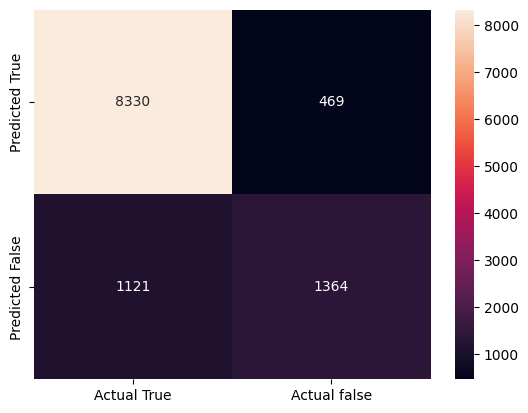

In [107]:
sns.heatmap(pd.DataFrame(data = confusion_matrix(y_test, ypred), columns=['Actual True', 'Actual false'],index = ['Predicted True', 'Predicted False']), annot = True, fmt='d')

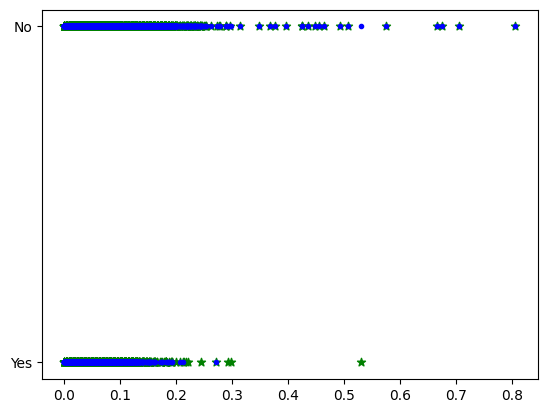

In [142]:
plt.scatter(X_test[:,3],y_test,color='green', marker='*')
plt.scatter(X_test[:,3],ypred,color='blue', marker='.')


In [114]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [118]:
print('f1 score is: ',f1_score(y_test, ypred, pos_label='Yes'))
print('precision score is: ',precision_score(y_test, ypred, pos_label='Yes'))
print('recall score is: ',recall_score(y_test, ypred, pos_label='Yes'))


f1 score is:  0.6317739694302918
precision score is:  0.7441352973267867
recall score is:  0.5488933601609658


In [119]:
tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()
specificity = tn / (tn+fp)
print(specificity)

0.9466984884645983


In [124]:
from sklearn.metrics import roc_auc_score, roc_curve

ns_auc = roc_auc_score(y_test, [0 for _ in range(len(y_test))])
print(ns_auc)

0.5


In [126]:
ns_fpr, ns_tpr, _= roc_curve(y_test, [0 for _ in range(len(y_test))], pos_label='Yes')
lr_fpr, lr_tpr, _ = roc_curve(y_test, log.predict_proba(X_test)[:,1], pos_label='Yes')

0.8885799854245373

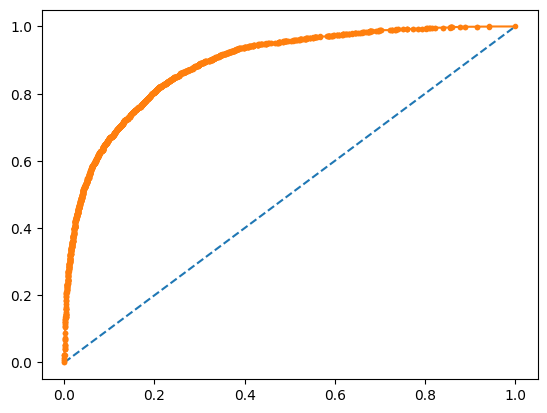

In [129]:
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.')
roc_auc_score(y_test, log.predict_proba(X_test)[:,1])